# RQ2

## get instances from csv data

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

column_names = ['index', 'eps', 
                'abonn_type', 'abonn_time', 'abonn_visit', 'abonn_status', 'abonn_lb', 
                'base_type', 'base_time', 'base_visit', 'base_status', 'base_lb', 
                'ab_type', 'ab_status', 'ab_time']

def readCSV(file_path):
	dataframe = pd.read_csv(file_path, sep=",", header=None, names=column_names)
	return dataframe

#if exist conclusive verification result, we select the verification instances
def readCSVEitherconclusive(file_path):
	dataframe = pd.read_csv(file_path, sep=",", header=None, names=column_names)
	conclusiveDf = dataframe[(dataframe.base_status != 'unknown') | (dataframe.abonn_status != 'unknown')]
	return conclusiveDf

## get data for figure

In [2]:
def getDataFig4(file_path):
	df = readCSVEitherconclusive(file_path)
	base_adv_time = df[(df.base_status == 'advExample') | (df.abonn_status == 'advExample')]['base_time']
	abonn_adv_time = df[(df.base_status == 'advExample') | (df.abonn_status == 'advExample')]['abonn_time']
	base_safe_time = df[(df.base_status == 'safe') | (df.abonn_status == 'safe')]['base_time']
	abonn_safe_time = df[(df.base_status == 'safe') | (df.abonn_status == 'safe')]['abonn_time']
	return base_adv_time, abonn_adv_time, base_safe_time, abonn_safe_time

## make box plot

In [3]:
def makeBoxPlot(file_path):
	targets = ['base', 'abonn']
	options = ['adv', 'verified']
	titles = ['Violated instance', 'Certified instance']
	xlabels = ['BaB-baseline', 'ABONN', 'BaB-baseline', 'ABONN']
	colors = ['#2ca02c', '#ff7f0e']
	positions = [target_num + 1 for target_num in range(len(targets) * 2)]

	# make figure
	fig, ax = plt.subplots(figsize=(7.5, 6))
	box_width = 0.5

	# get data set
	data_set = getDataFig4(file_path)
	
	for option_num in range(len(options)):
		for target_num in range(len(targets)):
			data = data_set[option_num * len(targets) + target_num]
			pos = positions[target_num + option_num * len(targets)]  # Adjust position for the second set of plots
			color = colors[target_num]
			ax.boxplot(data, positions=[pos], widths=box_width, patch_artist=True, showfliers=False, 
								boxprops={"facecolor": color, "edgecolor": 'k', "linewidth": 1.5}, 
								medianprops={"color": 'k', "linewidth": 1.5},
								whiskerprops={"color": 'k', "linewidth": 1},
								capprops={"color": 'k', "linewidth": 1},
								flierprops={'mfc': color, 'markeredgecolor': 'none', 'alpha': 0.3},
								zorder=10)
			
			# scatter
			scatter_width = box_width * 0.8  # adjust the width of scatter plot
			x_positions = np.random.uniform(pos - scatter_width/2, pos + scatter_width/2, size=len(data))
			ax.scatter(x_positions, data, s=30, color=color, alpha=0.6, zorder=20, edgecolor='k', linewidth=0.7)

	# mid line
	mid_position = len(targets) + 0.5
	ax.axvline(mid_position, color='black', linestyle='--', linewidth=1.5)

	# title
	if 'mnistl2.csv' in file_path:
		save_title = 'ml2'
	if 'mnistl4.csv' in file_path:
		save_title = 'ml4'
	if 'base.csv' in file_path:
		save_title = 'base'
	if 'deep.csv' in file_path:
		save_title = 'deep'
	if 'wide.csv' in file_path:
		save_title = 'wide'
	
	# plot setting
	ax.text(0.25, 1.05, titles[0], transform=ax.transAxes, fontsize=20, ha='center', va='center')
	ax.text(0.75, 1.05, titles[1], transform=ax.transAxes, fontsize=20, ha='center', va='center')
	ax.set_xticks(positions)
	ax.set_xticklabels(xlabels, fontsize=20, rotation=0)
	ax.grid(ls='--', lw=0.8, color='lightgrey', axis='y')
	ax.tick_params(axis='both', which='major', labelsize=20)
	ax.set_ylim(-50, 1050)
	
	ax.set_ylabel('Time(s)', fontsize=20)
	plt.tight_layout()

	# save and show
	save_file = f'../pdf/boxplot/boxplot_{save_title}.pdf'
	plt.savefig(save_file, bbox_inches='tight')
	plt.show()

## get box plot

In [4]:
def getRQ2Fig():
	files_list = [
		'mnistl2',
		'mnistl4',
		'base',
		'deep',
		'wide'
	]
	for file_name in files_list:
		file_path = f'../csv/{file_name}.csv'
		print(file_name)
		makeBoxPlot(file_path)

mnistl2


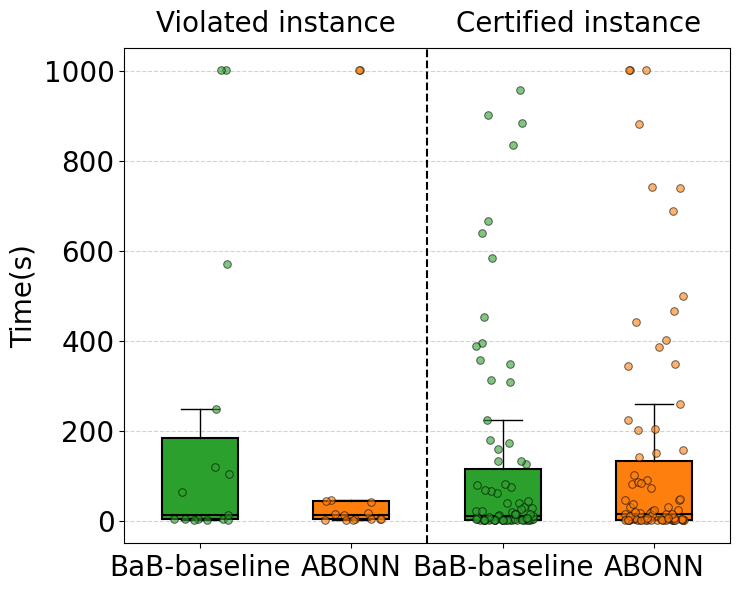

mnistl4


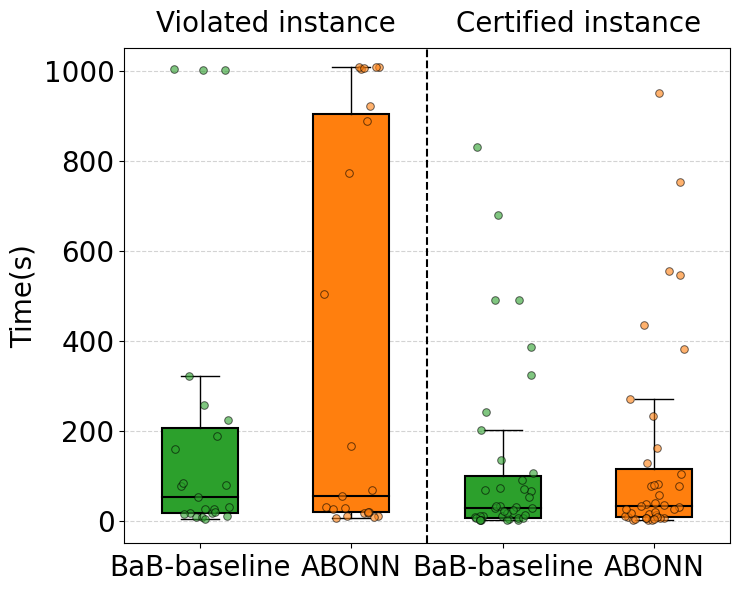

base


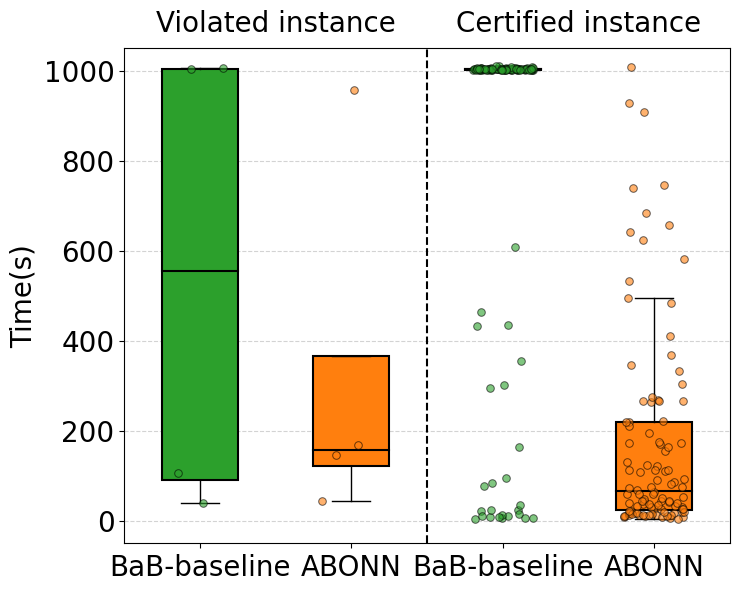

deep


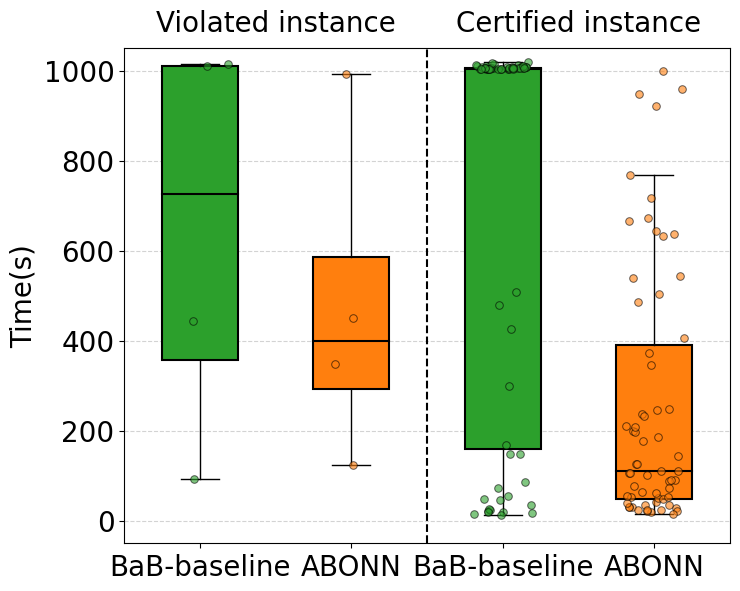

wide


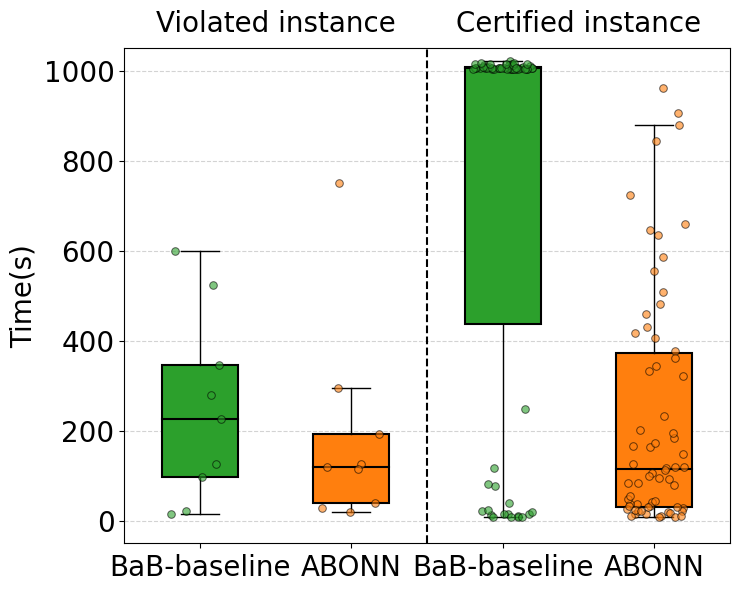

In [6]:
getRQ2Fig()